In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
for dirname, _, filenames in os.walk('Documents\severstal-steel-defect-detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Documents\severstal-steel-defect-detection\sample_submission.csv
Documents\severstal-steel-defect-detection\train.csv
Documents\severstal-steel-defect-detection\test_images\0000f269f.jpg
Documents\severstal-steel-defect-detection\test_images\000ccc2ac.jpg
Documents\severstal-steel-defect-detection\test_images\002451917.jpg
Documents\severstal-steel-defect-detection\test_images\003c5da97.jpg
Documents\severstal-steel-defect-detection\test_images\0042e163f.jpg
Documents\severstal-steel-defect-detection\test_images\004f40c73.jpg
Documents\severstal-steel-defect-detection\test_images\00513039a.jpg
Documents\severstal-steel-defect-detection\test_images\006f39c41.jpg
Documents\severstal-steel-defect-detection\test_images\008725cbc.jpg
Documents\severstal-steel-defect-detection\test_images\0098ca44e.jpg
Documents\severstal-steel-defect-detection\test_images\00a0b7730.jpg
Documents\severstal-steel-defect-detection\test_images\00a0f9949.jpg
Documents\severstal-steel-defect-detection\test_images

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import cv2
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [6]:
!pip install --upgrade numpy
!pip install --upgrade opencv-python

     -------------------------------------- 61.2/61.2 kB 108.7 kB/s eta 0:00:00
   ---------------------------------------- 15.8/15.8 MB 1.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.3 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.3 which is incompatible.
streamlit 1.28.0 requires protobuf<5,>=3.20, but you have protobuf 3.19.6 which is incompatible.


   ---------------------------------------- 38.6/38.6 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.1.78
    Uninstalling opencv-python-4.8.1.78:
      Successfully uninstalled opencv-python-4.8.1.78


  You can safely remove it manually.


In [8]:
data = pd.read_csv("Documents/severstal-steel-defect-detection/train.csv")


In [9]:
data


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [10]:
data.shape


(7095, 3)

3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

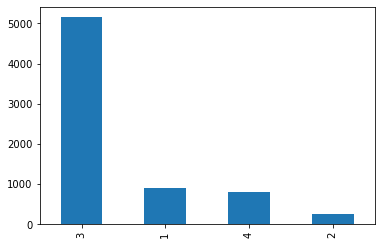

In [11]:
data["ClassId"].value_counts().plot(kind = 'bar')
data["ClassId"].value_counts()

In [16]:
l1=[]
l2=[] 
for img,ClassId,EncodedPixels in tqdm(data.values):
    image=cv2.imread("Documents/severstal-steel-defect-detection/train_images/{}".format(img),cv2.IMREAD_COLOR)
    image=cv2.resize(image,(120,120))
    l1.append(image)
    l2.append(ClassId)

100%|██████████████████████████████████████████████████████████████████████████████| 7095/7095 [02:07<00:00, 55.44it/s]


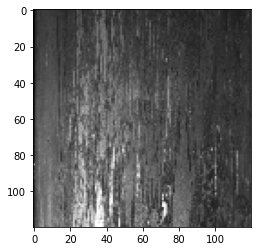

In [17]:
i = 15
plt.imshow(l1[i])

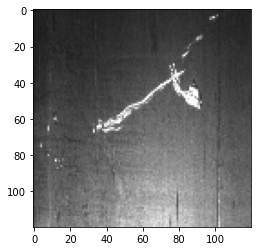

In [18]:
i = 16
plt.imshow(l1[i])

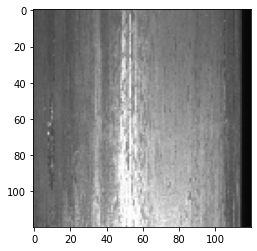

In [19]:
i = 90
plt.imshow(l1[i])

In [20]:
encoder = LabelEncoder()

X= np.array(l1)
X = X/255

y = encoder.fit_transform(l2)
y = to_categorical(y)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True)


In [22]:
print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (5676, 120, 120, 3)
x_test shape: (1419, 120, 120, 3)
y_train shape: (5676, 4)
y_test shape: (1419, 4)


In [23]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

In [24]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)

In [25]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [26]:
history = model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1, callbacks=[early_stopping])

Epoch 1/15
45/45 [==============================] - 21s 434ms/step - loss: 0.9117 - accuracy: 0.7135 - val_loss: 0.8195 - val_accuracy: 0.7259
Epoch 2/15
45/45 [==============================] - 19s 415ms/step - loss: 0.7879 - accuracy: 0.7326 - val_loss: 0.8119 - val_accuracy: 0.7414
Epoch 3/15
45/45 [==============================] - 18s 404ms/step - loss: 0.7415 - accuracy: 0.7447 - val_loss: 0.7304 - val_accuracy: 0.7414
Epoch 4/15
45/45 [==============================] - 18s 407ms/step - loss: 0.7162 - accuracy: 0.7447 - val_loss: 0.7157 - val_accuracy: 0.7491
Epoch 5/15
45/45 [==============================] - 18s 397ms/step - loss: 0.6901 - accuracy: 0.7472 - val_loss: 0.6851 - val_accuracy: 0.7491
Epoch 6/15
45/45 [==============================] - 18s 398ms/step - loss: 0.6599 - accuracy: 0.7504 - val_loss: 0.7003 - val_accuracy: 0.7470
Epoch 7/15
45/45 [==============================] - 18s 401ms/step - loss: 0.6505 - accuracy: 0.7519 - val_loss: 0.6455 - val_accuracy: 0.7477

<AxesSubplot:title={'center':'Loss curve'}>

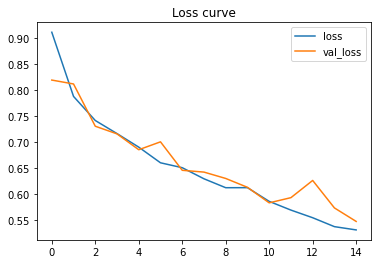

In [27]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<AxesSubplot:title={'center':'Accuracy curve'}>

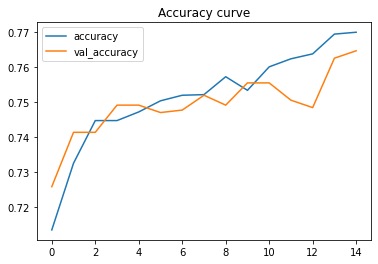

In [28]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [29]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

45/45 [==============================] - 1s 31ms/step - loss: 0.5469 - accuracy: 0.7646
[+] Accuracy: 76.46%
